In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

%load_ext nb_black
# =====================
housing = pd.read_csv(r"housing.csv")

# housing.head(20)
# housing.tail()
# housing[1:5]
# housing.shape
# housing.info()
# housing.columns
# housing['ocean_proximity'].unique()
# housing["ocean_proximity"].value_counts()
# housing[housing["ocean_proximity"] == "ISLAND"]
# housing[["population", "median_income"]][housing["ocean_proximity"] == "ISLAND"]
# housing.describe()
# housing.hist(bins=50, figsize=(20, 15))
# plt.show()
# ===================

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.shape

test_set.shape
train_set.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
15795,-122.42,37.77,52.0,4226.0,1315.0,2619.0,1242.0,2.5755,325000.0,NEAR BAY


<IPython.core.display.Javascript object>

In [4]:
# becuse we have lable and we wanna predet the label sooo we have supervised algoritm
# and becouse of we donot want classification so we have regresion
train_set.tail()
data = train_set.copy()
# we have the map of california
# each point in the plot bellow is a row of the our table
# alpha --> چگالی مناطق رو به ما میده
# data.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7), alpha=0.2)
# ===============================
# s for شعاع هر دایره در
# data.plot(kind="scatter", x="longitude", y="latitude",
#           s=data['population']/30,label='population'
#           ,figsize=(10, 7), alpha=0.2)
# ============================
# ما میانگین قیمت خانه در هرمنطقه که ویژگی اصلی ما هست و هدف ما پیش بیین ی
# اون هست رو هم وارد بازی می کنیم
#
# data.plot(
#     kind="scatter",
#     x="longitude",
#     y="latitude",
#     s=data["population"] / 30,
#     label="population",
#     c="median_house_value",
#     cmap=plt.get_cmap("jet"),
#     figsize=(10, 7),
#     alpha=0.2,
# )


# ================
# پیدا کردن وابستگی ها
# از همه مهم تر پیدا کردن وابستگی ستون های  دیگر با ستون هدف اس...


# =============
# standard correlation coeficient 
# مقدارش از -۱ تا ۱ هست ... که درجه وابستگی رو میگه هر چی به  ۱ نزدیک تر بشه وابستگی
# مثبت داره ...
# و هرچی به -۱ نزدیگ بشگی وابستگی زیادی داره اما وابستگی منفی 
# ضریب استاندارد وابستگی
# مشکلش اینه فقط وابستگی های خطی رو به ما میده

# find relation of each posssible tuple
corr_matrix = data.corr()
# print(corr_matrix)
corr_matrix

# becuse of we wanna relation of each row with median_house_value

# corr_matrix["median_house_value"]

corr_matrix["median_house_value"].sort_values(ascending=False)



median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

<IPython.core.display.Javascript object>

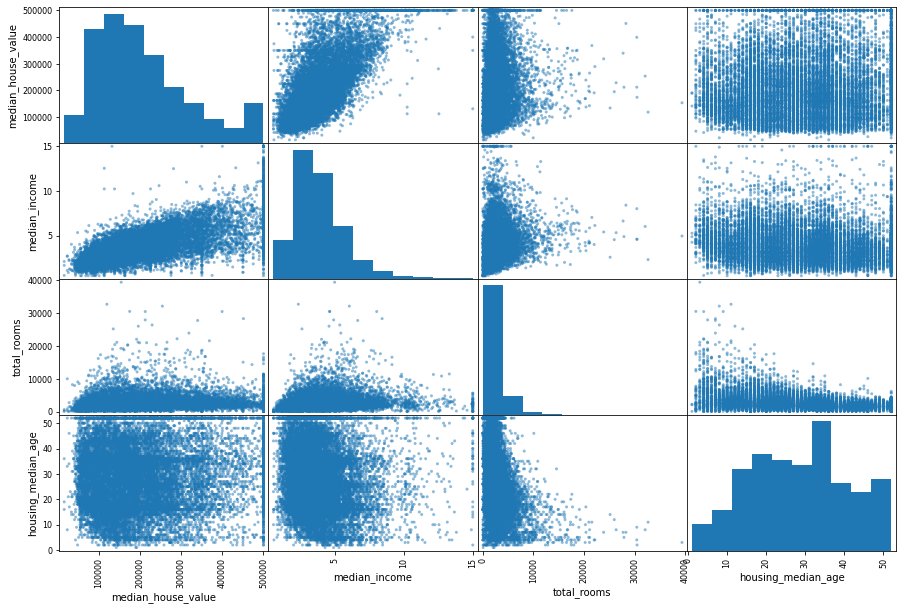

<IPython.core.display.Javascript object>

In [5]:
# روش دوم برای پیدا کردن وابستگی ...

# ویژگی های که حدس میزنیم با میانگین قیمت ما وابسته هست و به هم ربط دارن رو
# میریزیم درون یک ارایه
# چون ممکنه بعضی وابستگی ها خطی نباشه اونایی که حدس میزیم رو ریختیم
# تو ارایه تا چک کنیم چی به چیه
features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[features], figsize=(15, 10))
plt.show()

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


<IPython.core.display.Javascript object>

median_house_value                1.000000
median_income                     0.690647
total_rooms_per_households        0.158485
total_rooms                       0.133989
housing_median_age                0.103706
households                        0.063714
total_bedrooms                    0.047980
population_per_households        -0.022030
population                       -0.026032
longitude                        -0.046349
latitude                         -0.142983
total_bedrooms_per_total_rooms   -0.257419
Name: median_house_value, dtype: float64

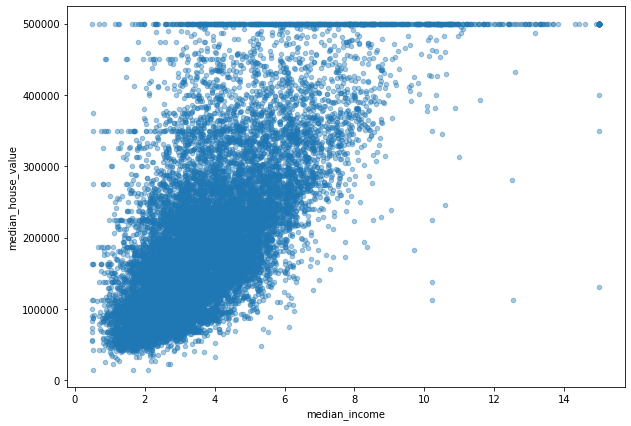

<IPython.core.display.Javascript object>

In [7]:
# حال که مطمعن شدیم کورلیشن راست گفته و با حقوق افراد وابستگی
# داریم فقط پس میایم روی این ستون زوم میکنیم

data.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    figsize=(10, 7),
    alpha=0.4,
)

# ما یک سقف قیمت داریم
# قیمت ها بیشتر از ۵۰۰۰۰ نداریم
# یجورایی انگار قیمت های بالای این حد رو روند کردن و همش ۵۰۰۰۰۰۰ درنظر گرفتن
# حتی در قیمیت های دیگر مصل ۳۵هزار هم همین مشکل هست انگار قیمتا رو روند کردن
# باید در مرجله بعد که تمیز کردن داده ها مهمه


# درسته اینجا ما دیدیم که فقط ستون حقوق بدرد مامیخوره وبقیه ستون های دیگر نه
# ایا اصلا بدرد نمیخوردن؟

# ممکنه ترکیب اینا به درد بخوره

# مایک دیتا جدید میسازیم تعداد اتاق ها به ازای هر خانوار

data["total_rooms_per_households"] = data["total_rooms"] / data["households"]
# تعداد کل اتاق خواب ها نسبت به تعداد روم ها رو بدست میاریم

data["total_bedrooms_per_total_rooms"] = data["total_bedrooms"] / data["total_rooms"]

# جمعیت به ازای هر خوانواده چه تاثیری داره یعنی جمعیت هر خانواده تاثیر دراه یا نه


data["population_per_households"] = data["population"] / data["households"]

corr_matrix = data.corr()
# print(corr_matrix)
corr_matrix

# becuse of we wanna relation of each row with median_house_value

# corr_matrix["median_house_value"]

corr_matrix["median_house_value"].sort_values(ascending=False)

